In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from time import time

### Black Scholes

$S_t$ - stock price at time t

$K$ - strike / exercise price

$\sigma$ - stock price volatility

$r$ - risk-free interest rate

$T$ - maturity

$q$ - dividend rate

Define useful functions

\begin{equation}
d_1  =\frac{1}{\sigma \sqrt{T-t}}\left[\ln \left(\frac{S_t}{K}\right)+\left(r - q +\frac{\sigma^2}{2}\right)(T-t)\right]
\end{equation}

\begin{equation}
d_2 =d_{1}-\sigma \sqrt{T-t}
\quad or\quad
d_{2}  =\frac{1}{\sigma \sqrt{T-t}}\left[\ln \left(\frac{S_t}{K}\right)+\left(r- q - \frac{\sigma^2}{2}\right)(T-t)\right]
\end{equation}

$$
N(x)=\frac{1}{\sqrt{2 \pi}} \int_{-\infty}^x e^{-z^2 / 2} d z
$$

$$
n(x)= N' (x) = \frac{1}{\sqrt{2 \pi}} e^{-x^2 / 2}
$$


We first list the Black-Scholes price formula and its Greeks for a Call option:
$\tau = T - t$

$$
\begin{aligned}
& C(S,K,T,t,r,q,\sigma) =S e^{-q \tau} N\left(d_1\right)-K e^{-r \tau} N\left(d_1-\sigma \sqrt{\tau}\right) \\
& \operatorname{Delta}(\Delta)= \frac{∂C}{\partial S}  = e^{-q \tau} N\left(d_1\right) \\
& \operatorname{Gamma}(\Gamma) = \frac{∂^2C}{\partial S^2} =\frac{e^{-q \tau}}{S \sigma \sqrt{\tau}} n\left(d_1\right) \\
& \text { Vega } = \frac{∂C}{\partial \sigma} =S e^{-q \tau} \sqrt{\tau} n\left(d_1\right) \\
& \operatorname{Rho}(\rho) = \frac{∂C}{\partial r} =K e^{-r \tau} \tau N\left(d_1-\sigma \sqrt{\tau}\right) \\
& \operatorname{Theta}(\Theta) = \frac{∂C}{\partial T} =S e^{-q \tau} r N\left(d_1\right)-K e^{-r \tau} q N\left(d_1-\sigma \sqrt{\tau}\right)-S e^{-q \tau} \frac{\sigma}{2 \sqrt{\tau}} n\left(d_1\right)
\end{aligned}
$$

And for a Put option:
$$
\begin{aligned}
& \text { BSPutPrice }=- \text { Se }^{-q \tau} N\left(-d_1\right)+K e^{-r \tau} N\left(-d_1+\sigma \sqrt{\tau}\right) \\
& \operatorname{Delta}(\Delta)=-e^{-q \tau} N\left(-d_1\right) \\
& \operatorname{Gamma}(\Gamma)=\frac{e^{-q \tau}}{S \sigma \sqrt{\tau}} n\left(d_1\right) \\
& \text { Vega }=S e^{-q \tau} \sqrt{\tau} n\left(d_1\right) \\
& \operatorname{Rho}(\rho)=-K e^{-r \tau} \tau N\left(-d_1+\sigma \sqrt{\tau}\right) \\
& \text { Theta }(\Theta)=-S e^{-q \tau} q N\left(-d_1\right)+K e^{-r \tau} r N\left(-d_1+\sigma \sqrt{\tau}\right)-S e^{-q \tau} \frac{\sigma}{2 \sqrt{\tau}} n\left(d_1\right)
\end{aligned}
$$


In [ ]:
def standardNormalGaussianDensity(x):
    return (1/np.sqrt(2*np.pi))*np.exp(-.5*np.power(x,2))

def d1(St, K, T, t, r, q, sigma):
    return (np.log(St/K) + (r -q + sigma**2/2)*(T-t))/(sigma*np.sqrt(T - t))

def d2(St, K, T, t, r, q, sigma):
    return (np.log(St/K) + (r - q - sigma**2/2)*(T-t))/(sigma*np.sqrt(T - t))

def BSMcall(St, K, T, t, r, q, sigma):
    """
    St: Stock price at time t
    t: reference time
    T: time to maturity
    r: risk free rate
    q : dividend rate
    sigma: volatility
    """
    _d1 = sp.special.ndtr(d1(St, K, T, t, r, q, sigma))
    _d2 = sp.special.ndtr(d2(St, K, T, t, r, q, sigma))

    return St*np.exp(-q*(T-t))*_d1 - K*np.exp(-r*(T-t))*_d2

def BSMdigitalCall(St, K, T, t, r, q, sigma):
    return np.exp(-r*(T-t))*sp.special.ndtr(d2(St, K, T, t, r, q, sigma))

def BSMput(St, K, T, t, r, q, sigma):
    _d1 = sp.special.ndtr(-d1(St, K, T, t, r, q, sigma))
    _d2 = sp.special.ndtr(-d2(St, K, T, t, r, q, sigma))

    return K*np.exp(-r*(T-t))*_d2 - St*np.exp(-q*(T-t))*_d1

def BSMdigitalPut(St, K, T, t, r, q, sigma):
    return np.exp(-r*(T-t))*sp.special.ndtr(-d2(St, K, T, t, r, q, sigma))

def BSMforwardPrice(St, K, T, t, r, q):
    return St*np.exp(-q*(T-t)) - K*np.exp(-r*(T-t))

def BSMzeroCouponBondPrice(T, t, r):
    return np.exp(-r*(T-t))


In [ ]:
def OneDGBMPathGenerator(d,S0,T,t,r,q,sigma):
    """
    d : number of paths
    S0: initial stock price
    T : maturity
    t: reference time
    r : risk free interest rate
    q : divident rate
    sigma : stock volatility
    """
    return S0*np.exp((r-q-sigma**2/2)*np.repeat(np.array([T-t]),d) + sigma*np.sqrt(T-t)*np.random.normal(size=(d)))

In [ ]:
def BSMcallDelta(St, K, T, t, r, q, sigma):
    _d1 = d1(St, K, T, t, r, q, sigma)
    return np.exp(-q*(T-t))*sp.special.ndtr(_d1)

def BSMcallGamma(St, K, T, t, r, q, sigma):
    _d1 = d1(St, K, T, t, r, q, sigma)
    nd1 = standardNormalGaussianDensity(_d1)
    tau = T - t
    return np.exp(-q*tau)*nd1/(St*sigma*np.sqrt(tau))

def BSMcallVega(St, K, T, t, r, q, sigma):
    _d1 = d1(St, K, T, t, r, q, sigma)
    nd1 = standardNormalGaussianDensity(_d1)
    tau = T - t
    return St*np.exp(-q*tau)*np.sqrt(tau)*nd1

def BSMcallRho(St, K, T, t, r, q, sigma):
    _d2 = d2(St, K, T, t, r, q, sigma)
    tau = T - t
    return K*np.exp(-r*tau)*tau*sp.special.ndtr(_d2)

def BSMcallTheta(St, K, T, t, r, q, sigma):
    tau = T - t
    _d1 = d1(St, K, T, t, r, q, sigma)
    _d2 = _d1 - sigma*np.sqrt(tau)
    nd1 = standardNormalGaussianDensity(_d1)
    nd1 = standardNormalGaussianDensity(_d1)
    return St*np.exp(-q*tau)*q*sp.special.ndtr(_d1) - K*np.exp(-r*tau)*r*sp.special.ndtr(_d2) - St*np.exp(-q*tau)*sigma*nd1/(2*np.sqrt(tau))

def BSMputDelta(St, K, T, t, r, q, sigma):
    _d1 = d1(St, K, T, t, r, q, sigma)
    return np.exp(-q*(T-t))*sp.special.ndtr(-_d1)

def BSMputGamma(St, K, T, t, r, q, sigma):
    _d1 = d1(St, K, T, t, r, q, sigma)
    nd1 = standardNormalGaussianDensity(_d1)
    tau = T - t
    return np.exp(-q*tau)*nd1/(St*sigma*np.sqrt(tau))

def BSMputVega(St, K, T, t, r, q, sigma):
    _d1 = d1(St, K, T, t, r, q, sigma)
    nd1 = standardNormalGaussianDensity(_d1)
    tau = T - t
    return St*np.exp(-q*tau)*np.sqrt(tau)*nd1

def BSMputRho(St, K, T, t, r, q, sigma):
    _d2 = d2(St, K, T, t, r, q, sigma)
    tau = T - t
    return -K*np.exp(-r*tau)*tau*sp.special.ndtr(-_d2)

def BSMputTheta(St, K, T, t, r, q, sigma):
    tau = T - t
    _d1 = d1(St, K, T, t, r, q, sigma)
    _d2 = _d1 - sigma*np.sqrt(tau)
    nd1 = standardNormalGaussianDensity(_d1)
    nd1 = standardNormalGaussianDensity(_d1)
    return -St*np.exp(-q*tau)*q*sp.special.ndtr(-_d1) + K*np.exp(-r*tau)*r*sp.special.ndtr(-_d2) - St*np.exp(-q*tau)*sigma*nd1/(2*np.sqrt(tau))


In [ ]:
# Pricing the Monte Carlo call
def MonteCarloCall(S, K, T, t):
    """
    S: numpy array. These are the price paths of the stock price
    K: strike price
    T: maturity
    t: reference time
    dt: time step
    """
    return np.mean(np.maximum(S - K,0))*np.exp(-r*(T-t))

def MonteCarloDigitalCall(S, K, T, t):
    """
    S: numpy array. These are the price paths of the stock price
    K: strike price
    """

    return np.mean(S - K > 0)*np.exp(-r*(T-t))

def MonteCarloPut(S, K, T, t):
    """
    S: numpy array. These are the price paths of the stock price
    K: strike price
    """
    return np.mean(np.maximum(K - S,0))*np.exp(-r*(T-t))

def MonteCarloDigitalPut(S, K, T, t):
    """
    S: numpy array. These are the price paths of the stock price
    K: strike price
    """
    return np.mean(K - S > 0)*np.exp(-r*(T-t))

def MonteCarloZeroCouponBond(S, K, T, t):
    """
    S: numpy array. These are the price paths of the stock price
    K: strike price
    """
    return MonteCarloDigitalPut(S, K, T, t) + MonteCarloDigitalCall(S, K, T, t)

def MonteCarloForwardPrice(S, K, T, t):
    """
    S: numpy array. These are the price paths of the stock price
    K: strike price
    """
    return np.mean(S - K)*np.exp(-r*(T-t))


## Testing

In [ ]:
epsilon = 1e-3
T = np.random.uniform(0.01,5)
t = np.random.uniform(0.01,T)
S0 = np.random.uniform(20,100)
K = np.random.normal(S0,S0*5/100) # Draw a Gaussian distributed Strike price around initial stock price
# If the strike price is very away from S0 we essentially explore a 0 value region for which the Monte Carlo approximations fail
r = np.random.uniform(0.001, 0.1) #risk free rate
#q = np.random.uniform(0.001,r/2) # divident rate
q = 0
sigma = np.random.uniform(0.001, 0.3)
print(f'Using parameters: r = {r:.2f}, q = {q:.2f}, sigma = {sigma:.2f}, t = {t:.2f} years, T = {T:.2f} years, S0 = {S0:.2f}, K = {K:.2f}')

Using parameters: r = 0.03, q = 0.00, sigma = 0.19, t = 1.91 years, T = 3.79 years, S0 = 79.89, K = 81.87


Delta ($\Delta$) - approximation vs analytical formula

In [ ]:
_deltaApprox = (BSMcall(S0 +epsilon, K, T, t, r, q, sigma) - BSMcall(S0, K, T, t, r, q, sigma))/epsilon
_deltaDiscrepancy = (_deltaApprox - BSMcallDelta(S0, K, T, t, r, q, sigma))/BSMcallDelta(S0, K, T, t, r, q, sigma)
print(f'The discrepancy between the approximation and the analytical formula for the Delta is {_deltaDiscrepancy*100:.2f} %')

The discrepancy between the approximation and the analytical formula for the Delta is 0.00 %


Gamma ($\Gamma$) - approximation vs analytical formula

In [ ]:
_gammaApprox =(BSMcall(S0 +epsilon, K, T, t, r, q, sigma) + BSMcall(S0 - epsilon, K, T, t, r, q, sigma) - 2*BSMcall(S0, K, T, t, r, q, sigma))/epsilon**2
_gammaDiscrepancy = (_gammaApprox - BSMcallGamma(S0, K, T, t, r, q, sigma))/BSMcallGamma(S0, K, T, t, r, q, sigma)
print(f'The discrepancy between the approximation and the analytical formula for the Gamma is {_gammaDiscrepancy*100:.2f} %')

The discrepancy between the approximation and the analytical formula for the Gamma is 0.00 %


## Plots

The delta of a call as a function of spot

Using parameters: r = 0.03, q = 0.00, sigma = 0.19, t = 1.91 years, T = 3.79 years, S0 = 79.89, K = 81.87


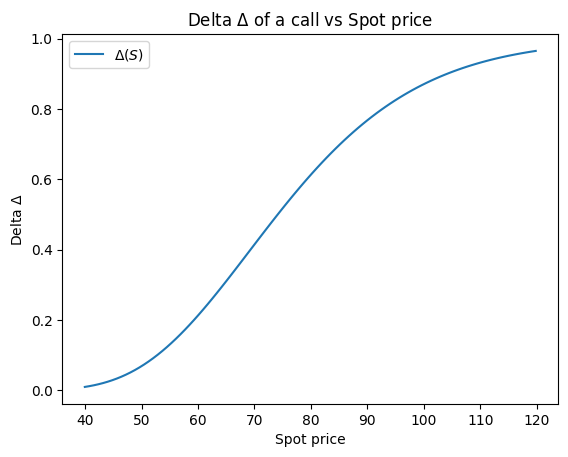

In [ ]:
sVec = np.linspace(.5*S0, 1.5*S0, 100)
DeltavsS = BSMcallDelta(St =  sVec, K = K, T=T,  t = t, r = r, q = q, sigma = sigma)
fig,ax = plt.subplots()
ax.plot(sVec,DeltavsS, label=r"$\Delta (S)$")
ax.set_xlabel('Spot price')
ax.set_ylabel(r'Delta $\Delta$')
ax.set_title(r'Delta $\Delta$ of a call vs Spot price')
ax.legend()
print(f'Using parameters: r = {r:.2f}, q = {q:.2f}, sigma = {sigma:.2f}, t = {t:.2f} years, T = {T:.2f} years, S0 = {S0:.2f}, K = {K:.2f}')

Delta of a call vs maturity

/tmp/ipython-input-764524921.py:5: RuntimeWarning: invalid value encountered in sqrt
  return (np.log(St/K) + (r -q + sigma**2/2)*(T-t))/(sigma*np.sqrt(T - t))


Using parameters: r = 0.03, q = 0.00, sigma = 0.19, t = 1.91 years, T = 3.79 years, S0 = 79.89, K = 81.87


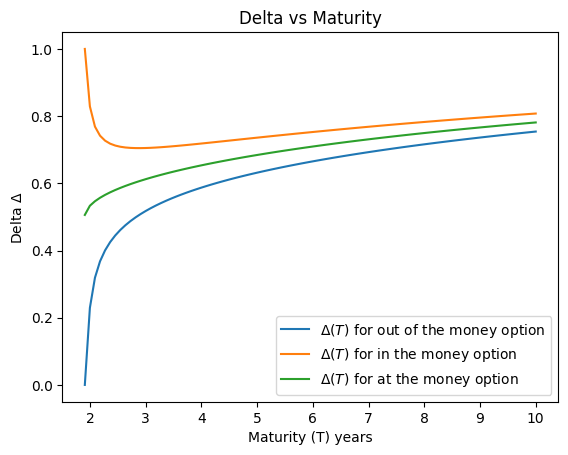

In [ ]:
TVec = np.linspace(1, 10, 100)
DeltavsT1 = BSMcallDelta(S0, S0*1.05, TVec, t, r, q, sigma)
DeltavsT2 = BSMcallDelta(S0, S0*.95, TVec, t, r, q, sigma)
DeltavsT3 = BSMcallDelta(S0, S0, TVec, t, r, q, sigma)
fig,ax = plt.subplots()
ax.plot(TVec,DeltavsT1, label=r"$\Delta(T)$ for out of the money option")
ax.plot(TVec,DeltavsT2, label=r"$\Delta(T)$ for in the money option")
ax.plot(TVec,DeltavsT3, label=r"$\Delta(T)$ for at the money option")
ax.set_xlabel('Maturity (T) years')
ax.set_ylabel(r'Delta $\Delta$')
ax.set_title('Delta vs Maturity')
ax.legend()
print(f'Using parameters: r = {r:.2f}, q = {q:.2f}, sigma = {sigma:.2f}, t = {t:.2f} years, T = {T:.2f} years, S0 = {S0:.2f}, K = {K:.2f}')

Gamma as a function of spot

Using parameters: r = 0.03, q = 0.00, sigma = 0.19, t = 1.91 years, T = 3.79 years, S0 = 79.89, K = 81.87


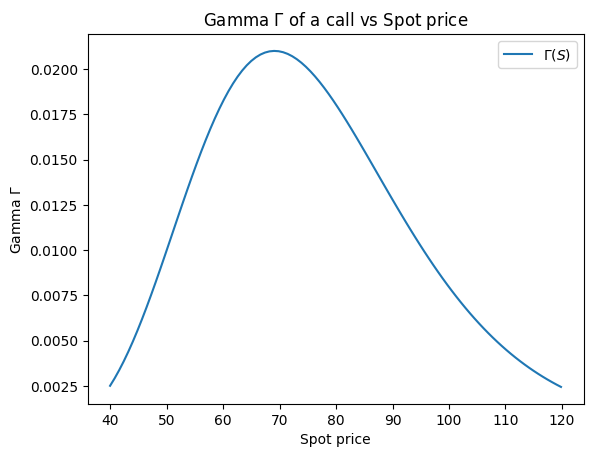

In [ ]:
sVec = np.linspace(.5*S0, 1.5*S0, 100)
GammavsS = BSMcallGamma(sVec, K, T, t, r, q, sigma)
fig,ax = plt.subplots()
ax.plot(sVec,GammavsS, label=r"$\Gamma(S)$")
ax.set_xlabel('Spot price')
ax.set_ylabel(r'Gamma $\Gamma$')
ax.set_title(r'Gamma $\Gamma$ of a call vs Spot price')
ax.legend()
print(f'Using parameters: r = {r:.2f}, q = {q:.2f}, sigma = {sigma:.2f}, t = {t:.2f} years, T = {T:.2f} years, S0 = {S0:.2f}, K = {K:.2f}')

The Vega of a call option as a function of volatility, as a function of spot and as a function of time

Using parameters: r = 0.03, q = 0.00, sigma = 0.19, t = 1.91 years, T = 3.79 years, S0 = 79.89, K = 81.87


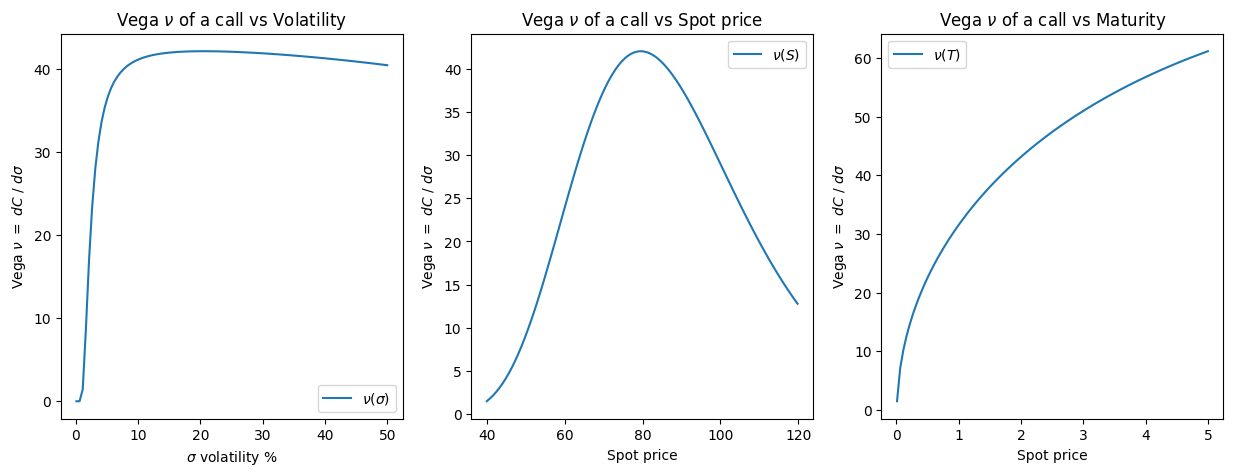

In [ ]:
volVec = np.linspace(0.001, .5, 100)
sVec = np.linspace(.5*S0, 1.5*S0, 100)
TVec = np.linspace(0.01, 5, 100)
fig,ax = plt.subplots(1,3, figsize = (15,5))
ax[0].plot(volVec*100,BSMcallVega(S0, K, T, t, r, q, volVec), label=r"$\nu (\sigma)$")
ax[0].set_xlabel(r'$\sigma$ volatility %')
ax[0].set_ylabel(r'Vega $\nu$ $=$ $dC$ / $d\sigma$')
ax[0].set_title(r'Vega $\nu$ of a call vs Volatility')
ax[0].legend()
ax[1].plot(sVec,BSMcallVega(sVec, K, T, t, r, q, sigma), label=r"$\nu (S)$")
ax[1].set_xlabel('Spot price')
ax[1].set_ylabel(r'Vega $\nu$ $=$ $dC$ / $d\sigma$')
ax[1].set_title(r'Vega $\nu$ of a call vs Spot price')
ax[1].legend()
ax[2].plot(TVec,BSMcallVega(S0, K, TVec, 0, r, q, sigma), label=r"$\nu (T)$")
ax[2].set_xlabel('Spot price')
ax[2].set_ylabel(r'Vega $\nu$ $=$ $dC$ / $d\sigma$')
ax[2].set_title(r'Vega $\nu$ of a call vs Maturity')
ax[2].legend()
print(f'Using parameters: r = {r:.2f}, q = {q:.2f}, sigma = {sigma:.2f}, t = {t:.2f} years, T = {T:.2f} years, S0 = {S0:.2f}, K = {K:.2f}')

# Monte Carlo Greeks

Run Monte Carlo simulation twice. Use different random number streams to get an estimate for the Delta and Gamma

In [ ]:
pf = 17 # final power of 2
d = np.power(2,pf-1) # Number of paths/trajectories over which to compute expectation value
eps = 1e-4
print(f'Using parameters: eps = {eps}, d = {d} paths,  r = {r:.2f}, q = {q:.2f}, sigma = {sigma:.2f}, t = {t:.2f} years, T = {T:.2f} years, S0 = {S0:.2f}, K = {K:.2f}')

Using parameters: eps = 0.0001, d = 65536 paths,  r = 0.03, q = 0.00, sigma = 0.19, t = 1.91 years, T = 3.79 years, S0 = 79.89, K = 81.87


In [ ]:
W1 = np.random.normal(size=(d))
W2 = np.random.normal(size=(d))
W3 = np.random.normal(size=(d))
# OneDGBMPathGenerator(d,S0,T,r,q,sigma):
S1 = S0*np.exp((r-q-sigma**2/2)*np.repeat(np.array([T-t]),d) + sigma*np.sqrt(T-t)*W1)
S2 = (S0+eps)*np.exp((r-q-sigma**2/2)*np.repeat(np.array([T-t]),d) + sigma*np.sqrt(T-t)*W2)
S3 = (S0-eps)*np.exp((r-q-sigma**2/2)*np.repeat(np.array([T-t]),d) + sigma*np.sqrt(T-t)*W2)

call1 = MonteCarloCall(S1,K,T,t)
call2 = MonteCarloCall(S2,K,T,t)
call3 = MonteCarloCall(S3,K,T,t)

_mcDelta = (call2 - call1)/(eps)
_analyticalDelta = BSMcallDelta(S0, K, T, t, r, q, sigma)
_deltaDiscrepancy = (_mcDelta - _analyticalDelta)/_analyticalDelta
print(f'The discrepancy between the approximation and the analytical formula for the Delta is {_deltaDiscrepancy*100:.2f} %')

_mcGamma = (call2 - 2*call1 + call3)/(eps**2)
_analyticalGamma = BSMcallGamma(S0, K, T, t, r, q, sigma)
_gammaDiscrepancy = (_mcGamma - _analyticalGamma)/_analyticalGamma
print(f'The discrepancy between the approximation and the analytical formula for the Gamma is {_gammaDiscrepancy*100:.2f} %')

The discrepancy between the approximation and the analytical formula for the Delta is 58865.19 %
The discrepancy between the approximation and the analytical formula for the Gamma is 39810447336.42 %


Run Monte Carlo simulation twice. Use the same random number stream to get an estimate for the Delta and Gamma

In [ ]:
print(f'Using parameters: eps = {eps}, d = {d} paths,  r = {r:.2f}, q = {q:.2f}, sigma = {sigma:.2f}, t = {t:.2f} years, T = {T:.2f} years, S0 = {S0:.2f}, K = {K:.2f}')
W = np.random.normal(size=(d))
# OneDGBMPathGenerator(d,S0,T,r,q,sigma):
S1 = S0*np.exp((r-q-sigma**2/2)*np.repeat(np.array([T-t]),d) + sigma*np.sqrt(T-t)*W)
S2 = (S0+eps)*np.exp((r-q-sigma**2/2)*np.repeat(np.array([T-t]),d) + sigma*np.sqrt(T-t)*W)
S3 = (S0-eps)*np.exp((r-q-sigma**2/2)*np.repeat(np.array([T-t]),d) + sigma*np.sqrt(T-t)*W)

call1 = MonteCarloCall(S1,K,T,t)
call2 = MonteCarloCall(S2,K,T,t)
call3 = MonteCarloCall(S3,K,T,t)


_mcDelta = (call2 - call1)/(eps)
_analyticalDelta = BSMcallDelta(S0, K, T, t, r, q, sigma)
_deltaDiscrepancy = (_mcDelta - _analyticalDelta)/_analyticalDelta
print(f'The discrepancy between the approximation and the analytical formula for the Delta is {_deltaDiscrepancy*100:.2f} %')

_mcGamma = (call2 - 2*call1 + call3)/(eps**2)
print(f'Monte Carlo Gamma is {_mcGamma :.3f}')
_analyticalGamma = BSMcallGamma(S0, K, T, t, r, q, sigma)
_gammaDiscrepancy = (_mcGamma - _analyticalGamma)/_analyticalGamma
print(f'The discrepancy between the approximation and the analytical formula for the Gamma is {_gammaDiscrepancy*100:.2f} %')

Using parameters: eps = 0.0001, d = 65536 paths,  r = 0.03, q = 0.00, sigma = 0.19, t = 1.91 years, T = 3.79 years, S0 = 79.89, K = 81.87
The discrepancy between the approximation and the analytical formula for the Delta is 0.53 %
Monte Carlo Gamma is 0.000
The discrepancy between the approximation and the analytical formula for the Gamma is -100.00 %


Notice the Monte Carlo Gamma is essentially 0. This is because the GBM is continuous only up to first derivative and we are using pathwise methods to estimate Call prices. To avoid this we either need to use greater $ϵ$ or use alternative differentiation methods.

### Implement pathwise method of estimate the Greeks from Monte Carlo

Start from the European Call payoff function $Y = e^{-r(T-t)} (S_T-K)^+ = e^{-r(T-t)} (S_T-K) H(S_T-K)$

The Delta can be expressed as $ Δ = \frac{dY}{dS_0} = e^{-r(T-t)}\frac{S_T}{S_0}H(S_T-K)$, where $H$ is the Heaviside step function

We just need to compute the mean over many paths to find the $\Delta$


In [ ]:
W = np.random.normal(size=(d))
S = S0*np.exp((r-q-sigma**2/2)*np.repeat(np.array([T-t]),d) + sigma*np.sqrt(T-t)*W)

f1 = np.mean((S/S0)*(S > K))

_mcDelta = np.exp(-r*(T-t))*f1
_analyticalDelta = BSMcallDelta(S0, K, T, t, r, q, sigma)
_deltaDiscrepancy = (_mcDelta - _analyticalDelta)/_analyticalDelta
print(f'The discrepancy between the approximation and the analytical formula for the Delta is {_deltaDiscrepancy*100:.2f} %')

f2 = np.mean(S*(-sigma*(T-t)+np.sqrt(T-t)*W)*(S>K))
_mcVega = np.exp(-r*(T-t))*f2
_analyticalVega = BSMcallVega(S0, K, T, t, r, q, sigma)
_vegaDiscrepancy = (_mcVega - _analyticalVega)/_analyticalVega
print(f'The discrepancy between the approximation and the analytical formula for the Vega is {_vegaDiscrepancy*100:.2f} %')

The discrepancy between the approximation and the analytical formula for the Delta is -0.38 %
The discrepancy between the approximation and the analytical formula for the Vega is -0.71 %


In [ ]:
def Phi(S0, ST, T, t, r, q, sigma):
    _x = -.5*((np.log(ST/S0) - (r-q-.5*sigma**2)*(T-t))/(sigma*np.sqrt(T-t)))**2
    return (1/(ST*sigma*np.sqrt(T-t)))*standardNormalGaussianDensity(_x)

### Implement likelihood ratio method to estimate the Greeks from Monte Carlo

The likelihood ratio leads to the following formulation of the Delta

$\Delta = e^{-r(T-t)}E\large[ (S_T-K)^+ \frac{Z}{S_0 \sigma \sqrt{T}} \large]$

In [ ]:
W = np.random.normal(size=(d))
S = S0*np.exp((r-q-sigma**2/2)*np.repeat(np.array([T-t]),d) + sigma*np.sqrt(T-t)*W)
f1 = np.mean((W/(S0*sigma*np.sqrt(T-t)))*(S-K)*(S > K))
_mcDelta = np.exp(-r*(T-t))*f1

_analyticalDelta = BSMcallDelta(S0, K, T, t, r, q, sigma)
_deltaDiscrepancy = (_mcDelta - _analyticalDelta)/_analyticalDelta
print(f'The discrepancy between the approximation and the analytical formula for the Delta is {_deltaDiscrepancy*100:.2f} %')


The discrepancy between the approximation and the analytical formula for the Delta is -0.79 %
